In [1]:
#手写字体识别
#全联接神经网络

In [50]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import os
import pylab
import numpy as np
import ssl

In [20]:
ssl._create_default_https_context = ssl._create_unverified_context  #下载数据忽略证书

In [54]:
#数据准备
mnist = input_data.read_data_sets(train_dir='./MNIST_data', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
#整理数据
x = tf.placeholder(tf.float32, [None, 784])  # 占位符，输入
y = tf.placeholder(tf.float32, [None, 10])  # 占位符，输出

In [25]:
# 构建模型
W = tf.Variable(tf.random_normal([784, 10]))  # 权重
b = tf.Variable(tf.zeros([10]))  # 偏置值，和神经元数量保持一致

pred_y = tf.nn.softmax(tf.matmul(x, W) + b)  # softmax分类
print("pred_y.shape:", pred_y.shape)

pred_y.shape: (?, 10)


In [26]:
# 损失函数
cross_entropy = -tf.reduce_sum(y * tf.log(pred_y),
                               reduction_indices=1)  # 求交叉熵

cost = tf.reduce_mean(cross_entropy)  # 求损失函数平均值

In [27]:
#梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [28]:
#模型保存对象
saver = tf.train.Saver()
model_path = "/Users/limuyuan/Documents/Artificial-Intelligence-Note/8_12/model/"

In [32]:
batch_size = 100

In [29]:
#变量初始化
#这里的样本初始化直接在对话中完成

In [41]:
#执行
with tf.Session() as sess:
    #初始化变量
    sess.run(tf.global_variables_initializer())

    #在训练前检查是否有模型保存
    if os.path.exists('/Users/limuyuan/Documents/Artificial-Intelligence-Note/8_12/model/checkpoint'):
        saver.restore(sess, '/Users/limuyuan/Documents/Artificial-Intelligence-Note/8_12/model/')

    for epoch in range(10):
        total_batch = int(mnist.train.num_examples / batch_size)
        #求平均损失值
        total_cost = 0
        for i in range(total_batch):
            #拿到一个批次的样本数据
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            params = {x: batch_xs, y: batch_ys}
            o, cost_res = sess.run([optimizer, cost],
                                   feed_dict=params)
            #求平均损失值
            total_cost += cost_res

        #平均损失值
        avg_cost = total_cost / total_batch
        print('epoch:{},cost:{}'.format(epoch + 1, avg_cost))

    print('训练完成')

    #模型评估
    corr_pred = tf.equal(tf.argmax(y, 1),  #真实类别
                         tf.argmax(pred_y, 1))  #判断水平方向索引是否相等， 会得到一个bool数组
    #精度
    acc = tf.reduce_mean(tf.cast(corr_pred, 'float32'))
    print('精度:', acc.eval({x: mnist.test.images, y: mnist.test.labels}))  #eval（）传feed_dict方式

    #保存模型
    save_path = saver.save(sess, '/Users/limuyuan/Documents/Artificial-Intelligence-Note/8_12/model/')
    print('保存成功:', save_path)



INFO:tensorflow:Restoring parameters from /Users/limuyuan/Documents/Artificial-Intelligence-Note/8_12/model/
epoch:1,cost:0.4641485684161836
epoch:2,cost:0.4631457620588216
epoch:3,cost:0.4620907121422616
epoch:4,cost:0.4610834200815721
epoch:5,cost:0.4600337838313796
epoch:6,cost:0.45906901321627874
epoch:7,cost:0.4580818028206175
epoch:8,cost:0.4571037180586295
epoch:9,cost:0.45608931662006813
epoch:10,cost:0.45513980251821606
训练完成
精度: 0.8875
保存成功: /Users/limuyuan/Documents/Artificial-Intelligence-Note/8_12/model/


INFO:tensorflow:Restoring parameters from /Users/limuyuan/Documents/Artificial-Intelligence-Note/8_12/model/
预测类别为: [4 5]
真实类别: [4 5]
预测概率为: [0.9988751 0.999071 ]


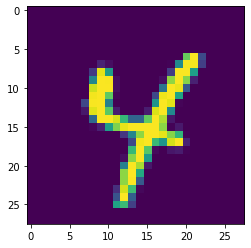

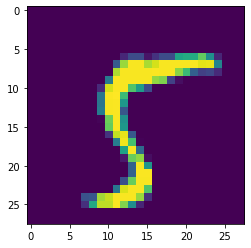

In [53]:
#从测试集中抽取两张图像进行预测
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  #初始化
    saver.restore(sess, '/Users/limuyuan/Documents/Artificial-Intelligence-Note/8_12/model/')  #加载模型

    #从测试集读两张图像
    test_images, test_labels = mnist.test.next_batch(batch_size=2)
    out_put = tf.arg_max(pred_y, 1)  #axis=1
    out_val, predv = sess.run([out_put, pred_y], feed_dict={x: test_images})  #feed_dict为pred_y传参数
    print('预测类别为:', out_val)
    print('真实类别:', np.argmax(test_labels, axis=1))  #这个返回最大值的索引
    print("预测概率为:", np.max(predv, axis=1))  #这个返回最大的值

    #显示图像
    img = test_images[0]
    img = img.reshape(-1, 28)
    pylab.imshow(img)
    pylab.show()

    #显示图像
    img = test_images[1]
    img = img.reshape(-1, 28)
    pylab.imshow(img)
    pylab.show()